# Machine Learning Programming Optional Exercise: Multiple Linear Regression

In [1]:
#import package(s)
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 3 Linear regression with multiple variables
This part implements linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to ﬁrst collect information on recent houses sold and make a model of housing prices. 

The ﬁle ex1data2.txt contains a training set of housing prices in Portland, Oregon. The ﬁrst column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. 

<div class="alert alert-block alert-info">
<b>Note:</b> 
Given the multiple variables, the linear regression model for this dataset is $h_{\theta} (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$. Its general form is $h_{\theta} (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$.
    
Regression problems like this one will predict a real-value (continous) for the output. 
</div>

### 3.1 Feature Normalization
The values of house sizes are about 1000 times larger than the number of bedrooms. When features diﬀer by orders of magnitude, ﬁrst performing feature scaling can make gradient descent converge much more quickly.

Feature scaling causes the features to be within the same range of values using mean normalization. The process includes
- Subtract the mean value of each feature from the dataset. 
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

<div class="alert alert-block alert-info">
<b>Implementation Note:</b> When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new <b>x</b> value (living room area and number of bedrooms), <b>x</b> must first be normalized using the mean and standard deviation that was previously computed from the training set.
</div>

In [2]:
#define function for exercise(s)
def featureNormalize(X):
#   FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

    m = X.shape[0]
    n = X.shape[1]
    Xnorm = np.zeros((m, n))
    mu = np.zeros((1,n))
    sigma = np.zeros((1,n))
    
    if m==1:
        Xnorm = Xnorm
    else:
        for j in range(n):
            mu[:,j] = np.average(X[:,j])
            sigma[:,j] = np.std(X[:,j])
            for i in range(m):
                Xnorm[i,j] = (X[i,j] - mu[:,j])/(sigma[:,j])
    return Xnorm, mu, sigma

# ================ Part 1: Feature Normalization ================
print('Loading data ...')
#load txt file
data = loadtxt('ex1data2.txt',delimiter = ",")
#get all of the rows in the first and second columns (house size and number of bedrooms)
X = data[:,0:2] 
#get all of the rows in the third column (house price)
y = data[:,2]
#number of training examples
m = len(y)

#Print out some data points
print('First 10 examples from the dataset: ')
print('x = ', X[0:9,:])
print('y = ', y[0:9])

#Scale features and set them to zero mean
print('\nNormalizing Features ...')

X_norm, mu, sigma = featureNormalize(X)

#Add intercept term to the normalized X
X_norm = np.column_stack((np.ones((m,1)), X_norm))

Loading data ...
First 10 examples from the dataset: 
x =  [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]]
y =  [399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.]

Normalizing Features ...


### 3.2 Gradient Descent
The previous exercise implemented gradient descent on a univariate regression problem. The only diﬀerence now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged. 

The functions computeCostMulti and gradientDescentMulti is used to implement the cost function and gradient descent for linear regression with multiple variables. 
     
<div class="alert alert-block alert-info">
<b>Implementation Note:</b> In the multivariate case, the cost function can also be written in the following vectorized form:
    $\begin{align*} J(\theta) = \frac{1}{2m} (X \theta - \vec{y})^T (X \theta - \vec{y}) \end{align*}$ where $ X = \begin{bmatrix}
       -(x^{(1)})^T- \\
       -(x^{(2)})^T- \\
       \cdots \\
       -(x^{(m)})^T-
       \end{bmatrix}$, $\quad \vec{y} = \begin{bmatrix}
       y^{(1)} \\
       y^{(2)} \\
       \cdots \\
       y^{(m)}
       \end{bmatrix}$.
    
   The vectorized version is eﬃcient when you’re working with numerical computing tools. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

Running gradient descent ...



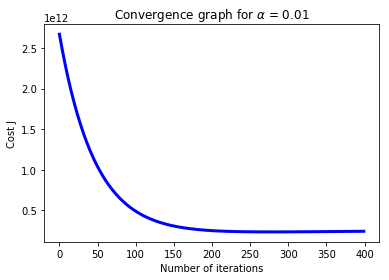

Theta computed from gradient descent:
  [[334302.06399328]
 [ 99482.18753743]
 [  3171.29633905]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $334302.06


In [3]:
#define function for exercise(s)
def hyp(theta,X):
#    Calculates the hypothesis function
#    X is size m training examples by n features
#    theta is size n features by one
    return np.dot(theta.T,X.T)

def computeCostMulti(X,y,theta):
#   COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
#   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y
#   X is m training examples by n features
#   theta is n features by 1
#   y is m training examples by 1
    A = np.dot(X,theta) - y
    return np.average(np.dot(A.T,A))/2

def gradientDescentMulti(X,y,theta,alpha,num_iters):
#   GRADIENTDESCENTMULTI Performs gradient descent to learn theta
#   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
#   taking num_iters gradient steps with learning rate alpha
    J_history = np.zeros((num_iters,1))
    theta_history = np.zeros((theta.shape[0],num_iters))
    for j in range(num_iters):
        for i in range(len(theta)):
            theta_history[i,j] = theta[i,:]
            theta[i,:] = theta[i,:] - alpha*np.average((hyp(theta,X)-y)*X[:,i])
        J_history[j] = computeCostMulti(X, y, theta)
    return theta, J_history, theta_history

# ================ Part 2: Gradient Descent ================
print('Running gradient descent ...\n')

#Choose some alpha value
alpha = 0.01
num_iters = 400

#Initialize Theta and Run Gradient Descent 
theta = np.zeros((3,1))
theta, J_history, theta_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

#Plot the convergence graph
it_vec = range(np.size(J_history))
plt.figure()
plt.plot(it_vec,J_history,'-b',linewidth=3)
plt.ylabel('Cost J')
plt.xlabel('Number of iterations')
plt.title(r'Convergence graph for $\alpha$ = %s' % alpha)
plt.show()

#Display gradient descent's result
print('Theta computed from gradient descent:')
print(' ', theta)

#Estimate the price of a 1650 sq-ft, 3 br house
x = np.array([[1650,3]])
x_norm = featureNormalize(x)
x_norm = np.column_stack((np.ones((1,1)), x_norm[2]))
price = np.dot(x_norm,theta)

print('\nPredicted price of a 1650 sq-ft, 3 br house (using gradient descent): $%.2f' % price)

### 3.3 Selecting Learning Rates (Optional)
Here, we will try out diﬀerent learning rates ($\alpha$) for the dataset and ﬁnd a learning rate that converges quickly, i.e. in less iterations.  For each learning rate, we set the number of iterations to 50 and then plot a history of cost values. We tried the suggestion values for $\alpha$, which are on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). If needed, adjust the number of iterations to see the overall trend in the curve. 

The result of the appropriate learning rate should match the image below. Though, it can look different in Python because of computational differences between OCTAVE/MATLAB and Python. 

Image Source: ex1.pdf from Andrew Ng's Coursera course in Machine Learning

![learn_rate.png](attachment:ex1/learn_rate.png)

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should ﬁnd that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge! 

<div class="alert alert-block alert-info">
<b>Implementation Note:</b>  If the learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. If the learning rate is too small, gradient descent can be slow to converge.
</div>
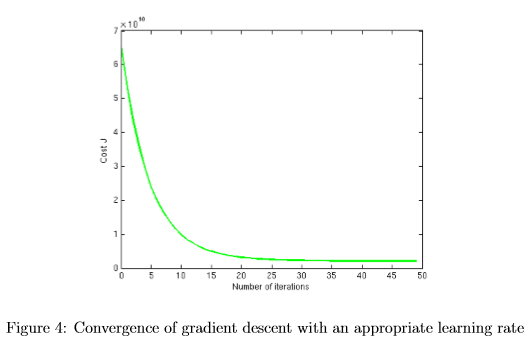

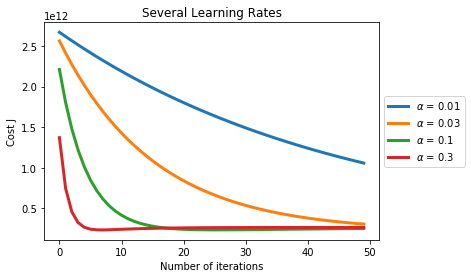

In [4]:
#create an array of alpha values
alpha = np.array([[0.01, 0.03, 0.1, 0.3]])
num_iters = 50

#Plot the convergence graph
plt.figure()
for i in range(alpha.shape[1]):
    theta = np.zeros((3,1))
    theta, J_history, theta_history = gradientDescentMulti(X_norm, y, theta, alpha[0][i], num_iters)
    it_vec = range(np.size(J_history))
    plt.plot(it_vec, J_history, label = r'$\alpha$ = %s' % alpha[0][i],linewidth=3.0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Cost J')
plt.xlabel('Number of iterations')
plt.title('Several Learning Rates')
plt.show()

I used the tip in the assignment to plot the results for each learning rate into one figure for comparison. From the plot, it looks like at $\alpha =0.3$ converges the fastest.


### 3.3 Normal Equations
The closed-form solution to linear regression is $\begin{align*} \theta = (X^T X)^{-1} X^T \vec{y} \end{align*}$. 
Using this formula does not require any feature scaling, and we will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. We will also get the values of $\theta$ that minimizes the cost function.

In [5]:
#define function for exercise(s)
def normalEqn(X,y):
#   NORMALEQN(X,y) computes the closed-form solution to linear 
#   regression using the normal equations.
    
    #calculate the normal equations in pieces
    A = np.dot(X.T,X)
    A_inv = np.linalg.inv(A)
    B = np.dot(X.T,y)
    theta = np.dot(A_inv,B)
    return theta

# ================ Part 3: Normal Equations ================

print('Solving with normal equations...')

#Data is already loaded. Skip to add intercept term to X
X = np.column_stack((np.ones((m,1)), X))

#Calculate the parameters from the normal equation
theta = normalEqn(X, y)

#Display normal equation's result
print('Theta computed from the normal equations: ')
print(' ', theta)

#Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot(np.matrix('1, 1650, 3'),theta)
print('\nPredicted price of a 1650 sq-ft, 3 br house (using normal equations): $%.2f' % price)

Solving with normal equations...
Theta computed from the normal equations: 
  [89597.9095428    139.21067402 -8738.01911233]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081.46


## Additional Plots

Here is a 3-dimensional plot of the data using the original, unscaled features. When there is more than one feature, it can be difficult to visualize the data and plot them in one figure. What we can do is plot each feature separately against the variable we wanted to predict, housing prices, but this can become a tedious process. 

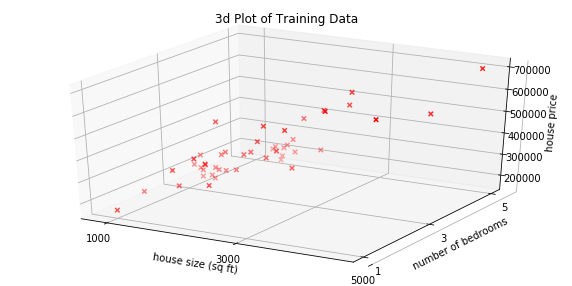

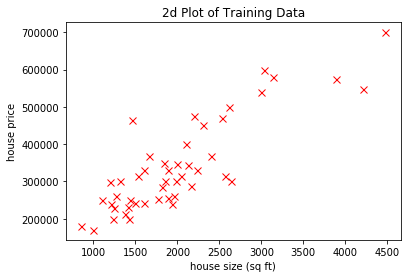

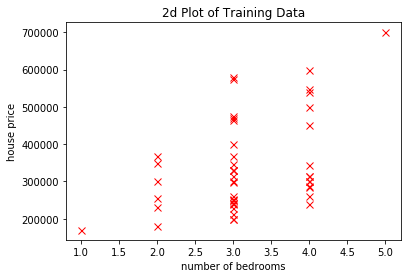

In [6]:
#3d plot of house price against house size and number of bedrooms
fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')
ax.scatter(X[:,1], X[:,2], y, c='r', marker='x')
ax.set_xticks([1000, 3000, 5000])
ax.set_yticks([1, 3, 5])
ax.set_xlabel('house size (sq ft)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('house price')
ax.set_title('3d Plot of Training Data')
plt.show()

#plot of house price against house size
plt.figure()
plt.plot(X[:,1],y,'rx',markersize=7)
plt.ylabel('house price')
plt.xlabel('house size (sq ft)')
plt.title('2d Plot of Training Data')
plt.show()

#plot of house price against number of bedrooms
plt.figure()
plt.plot(X[:,2],y,'rx',markersize=7)
plt.ylabel('house price')
plt.xlabel('number of bedrooms')
plt.title('2d Plot of Training Data')
plt.show()

Here are some plots of the housing price against the normalized features. You can see the range between the features are very similar. 

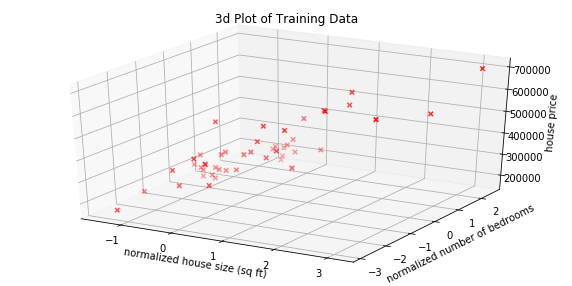

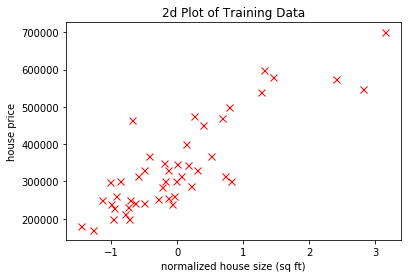

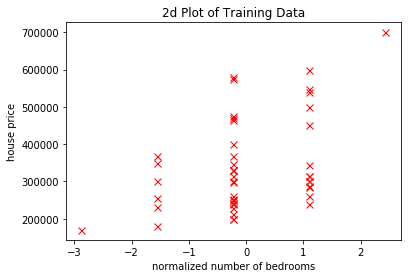

In [7]:
#3d plot of house price against house size and number of bedrooms
fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')
ax.scatter(X_norm[:,1], X_norm[:,2], y, c='r', marker='x')
ax.set_xlabel('normalized house size (sq ft)')
ax.set_ylabel('normalized number of bedrooms')
ax.set_zlabel('house price')
ax.set_title('3d Plot of Training Data')
plt.show()

#plot of house price against house size
plt.figure()
plt.plot(X_norm[:,1],y,'rx',markersize=7)
plt.ylabel('house price')
plt.xlabel('normalized house size (sq ft)')
plt.title('2d Plot of Training Data')
plt.show()

#plot of house price against number of bedrooms
plt.figure()
plt.plot(X_norm[:,2],y,'rx',markersize=7)
plt.ylabel('house price')
plt.xlabel('normalized number of bedrooms')
plt.title('2d Plot of Training Data')
plt.show()

Since the features were normalized, they are approximately normally distributed with mean zero and standard deviation one. This can be visualize using histograms.  

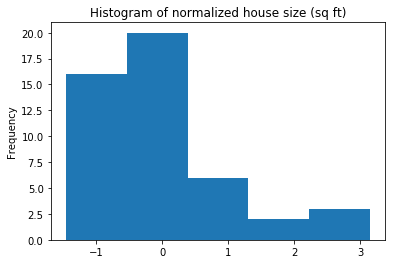

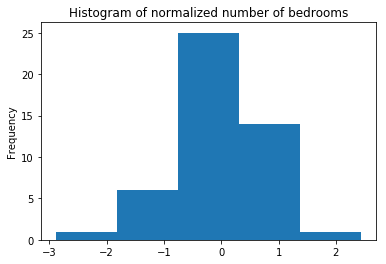

In [8]:
plt.figure()
plt.hist(X_norm[:,1], bins=5)
plt.title("Histogram of normalized house size (sq ft)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(X_norm[:,2], bins=5)
plt.title("Histogram of normalized number of bedrooms")
plt.ylabel("Frequency")
plt.show()